# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Initial_merge = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID'] )

# Display the data table for preview
Initial_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
Initial_merge['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Initial_merge[['Mouse ID', 'Timepoint']].value_counts().head(15)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
Name: count, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
    #Code Note 1: SaturnCloud post (10/7/23)
g989_info = Initial_merge[Initial_merge['Mouse ID'].str.contains('g989')]
g989_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989_rows = Initial_merge['Mouse ID'] == 'g989'
Cleaned_merge = Initial_merge[~g989_rows]
Cleaned_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(Cleaned_merge['Mouse ID'].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
    #Individual required value calculations
mean_drug = Cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_drug = Cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_drug = Cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_drug = Cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_drug = Cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


    #Merge and renames
summary_table = pd.merge(mean_drug,median_drug,how='left',on='Drug Regimen')
summary_table = pd.merge(summary_table,variance_drug,how='left',on='Drug Regimen')
summary_table = summary_table.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume Mean', 
                                              'Tumor Volume (mm3)_y':'Tumor Volume Median', 
                                              'Tumor Volume (mm3)':'Tumor Volume Variance'})
summary_table = pd.merge(summary_table, std_drug, how='left', on='Drug Regimen')
summary_table = pd.merge(summary_table,sem_drug,how='left',on='Drug Regimen')
summary_table = summary_table.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume Standard Dev',
                                              'Tumor Volume (mm3)_y': 'Tumor Volume SEM'})
summary_table.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
result = Cleaned_merge.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

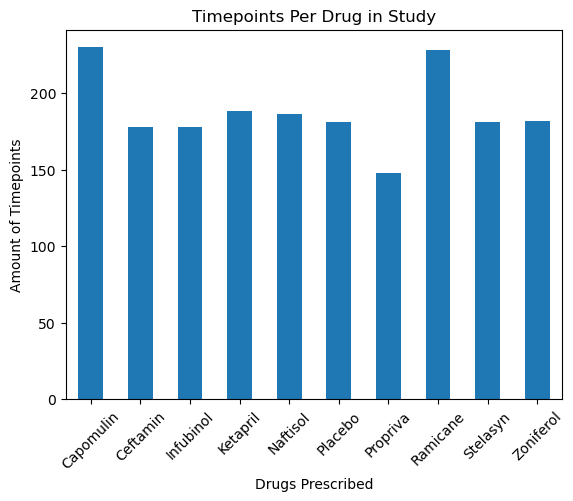

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sum = Cleaned_merge.groupby('Drug Regimen')['Mouse ID'].count()
sum.plot(kind='bar', rot=45)
plt.xlabel('Drugs Prescribed')
plt.ylabel('Amount of Timepoints')
plt.title('Timepoints Per Drug in Study')
plt.show()

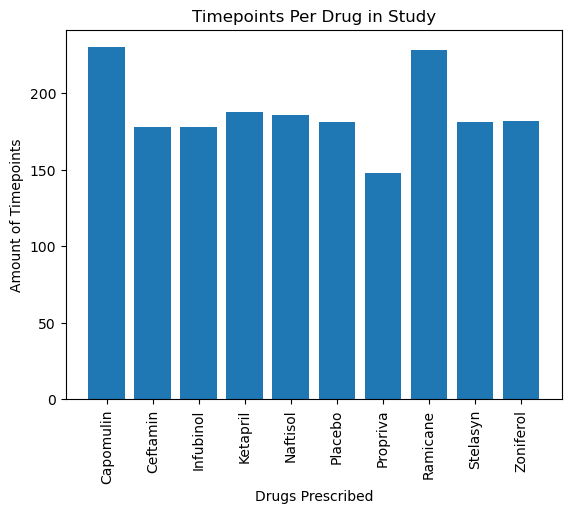

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
    #Uses same sum.df as last plot
drug_names = sum.index
drug_timepoints = sum.values
plt.bar(drug_names, drug_timepoints)
plt.xlabel('Drugs Prescribed')
plt.ylabel('Amount of Timepoints')
plt.title('Timepoints Per Drug in Study')
plt.xticks(rotation=90)
plt.show()

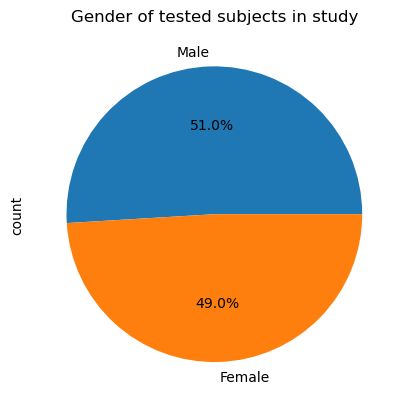

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = Cleaned_merge['Sex'].value_counts()
pie_panda = gender_count.plot(kind='pie', autopct="%1.1f%%")
plt.title("Gender of tested subjects in study")
plt.show()


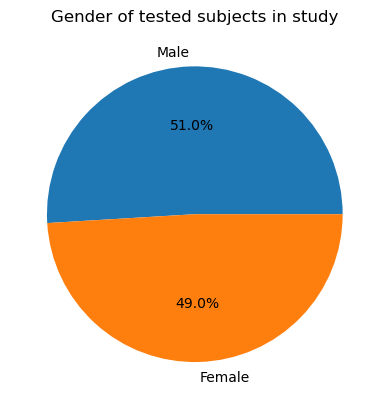

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Cleaned_merge['Sex'].value_counts()
size = [958,922]
explode = (0,0)
labels = ['Male','Female']
colours = ['blue', 'orange']
plt.pie(size,explode=explode,labels=labels, autopct="%1.1f%%")
plt.title("Gender of tested subjects in study")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
trial = treatment_df.groupby(['Mouse ID', 'Drug Regimen'])[['Timepoint', 'Tumor Volume (mm3)']].max()
trial

,,Timepoint,Tumor Volume (mm3)
Mouse ID,Drug Regimen,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,45.466677
a444,Ramicane,45,45.000000
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,45.000000
y865,Ceftamin,45,64.729837


In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_df = Cleaned_merge.loc[(Cleaned_merge['Drug Regimen'] == 'Capomulin') | 
                                 (Cleaned_merge['Drug Regimen'] == 'Ramicane') | 
                                 (Cleaned_merge['Drug Regimen'] == 'Infubinol') |
                                 (Cleaned_merge['Drug Regimen'] == 'Ceftamin') ]
treatment_df2 = treatment_df.loc[treatment_df.groupby('Mouse ID')['Timepoint'].idxmax()]
treatment_df2.reset_index(drop=True, inplace=True)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_plotting_df2 = pd.DataFrame(treatment_df2)
treatment_plotting_df2.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane', 'Infubinol', 'Capomulin', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

outliers = {}
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    current_treatment_data = treatment_plotting_df2.loc[treatment_plotting_df2['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(current_treatment_data.values)
    quartiles = current_treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # Determine outliers using upper and lower bounds
    potential_outliers = current_treatment_data[(current_treatment_data < lower_bound) | (current_treatment_data > upper_bound)]
    
    # Append potential outliers to the list
    outliers[treatment] = potential_outliers.tolist()
    print(outliers)



{'Ramicane': []}
{'Ramicane': [], 'Infubinol': [36.3213458]}
{'Ramicane': [], 'Infubinol': [36.3213458], 'Capomulin': []}
{'Ramicane': [], 'Infubinol': [36.3213458], 'Capomulin': [], 'Ceftamin': []}


Text(0.5, 1.0, 'Spread of specimen tumor sizes per experimental medication')

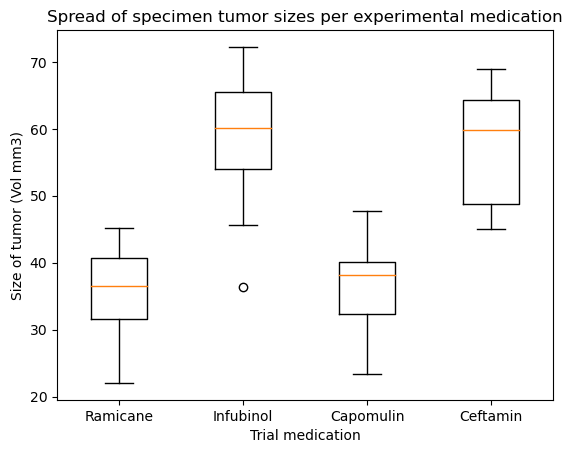

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments)
plt.xlabel("Trial medication")
plt.ylabel("Size of tumor (Vol mm3)")
plt.title("Spread of specimen tumor sizes per experimental medication")

## Line and Scatter Plots

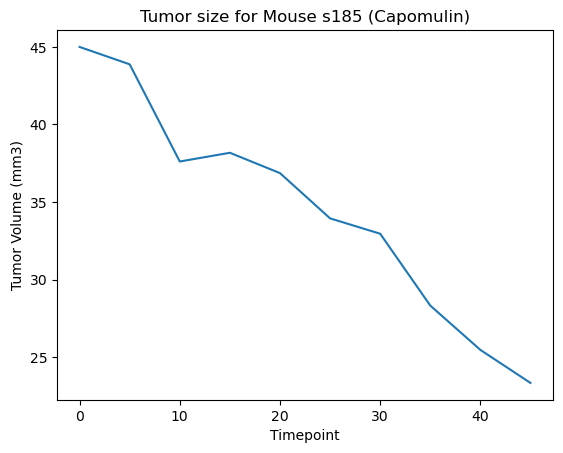

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = Cleaned_merge.loc[(Cleaned_merge['Drug Regimen'] == 'Capomulin')]
Capomulin_single = Cleaned_merge.loc[(Cleaned_merge['Mouse ID'] == 's185')]
Capomulin_single

plt.plot(Capomulin_single['Timepoint'], Capomulin_single['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor size for Mouse s185 (Capomulin)")
plt.show()

In [ ]:
Capomulin_single['Tumor Volume (mm3)'].mean()

34.559143395

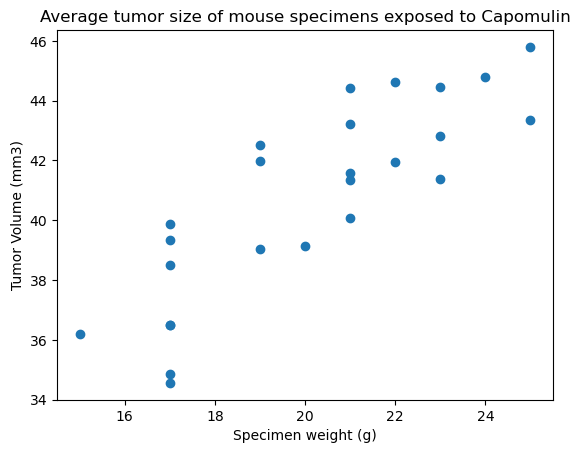

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mean = Cleaned_merge.loc[(Cleaned_merge['Drug Regimen'] == 'Capomulin')]
cap_mean = cap_mean.groupby(['Mouse ID', 'Drug Regimen'])[['Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']].mean()
cap_mean = pd.DataFrame(cap_mean)
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
plt.xlabel("Specimen weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average tumor size of mouse specimens exposed to Capomulin")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
print(f"The correlation between the weight(g) and tumor volume (mm3) in Capomulin is {round(correlation[0],2)}")

The correlation between the weight(g) and tumor volume (mm3) in Capomulin is 0.84


Text(20, 36, 'y = 0.95x + 21.55')

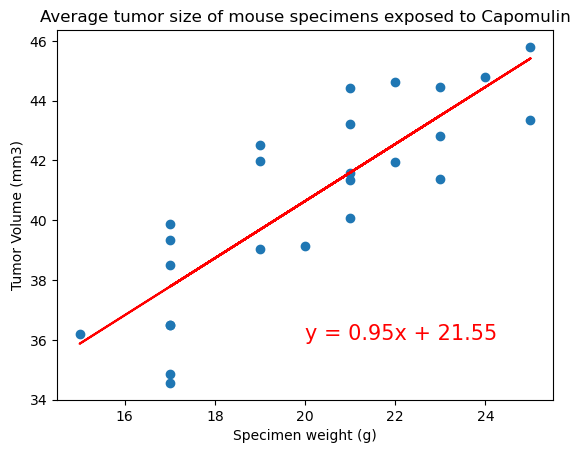

In [ ]:
x_values = cap_mean['Weight (g)']
y_values = cap_mean['Tumor Volume (mm3)']
plt.xlabel("Specimen weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average tumor size of mouse specimens exposed to Capomulin")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")